# Método de Euler aplicado al problema del paracaídas

###  Objetivo

Resolver una ecuación diferencial ordinaria (EDO) de primer orden que modela el movimiento de un paracaidista, aplicando el método numérico de Euler.


### Fundamento Teórico

#### Modelo Físico

Un paracaidista, con una masa de 68.1 kg salta de un globo aerostatico fijo. calcule la velocidad antes de abrir el paracaidas. Tomando en cuenta el coeficiente de resistencia = 12kg/s

Usando la segunda ley de newton :

$$ F=ma $$

$$ a = \frac{F}{m}$$  
                       Donde F = fuerza
                             m = masa
                             g = gravedad
                             a = aceleracion


Y sabiendo que la derivada de la velocidad es la aceleracion :


$$
\begin{align}
\frac{dv}{dv} = \frac{F}{m} = a
\end{align}
$$


Con:
$$
\begin{align}
F = F_D + F_U
\end{align}
$$


Donde :

$$
\begin{align}
F_D &= mg\\
F_U &= -cu
\end{align}
$$




Asi pues, sustituyendo terminos :

$$
\begin{align}
\frac{dv}{dt}= \frac{mg-cv}{m}
\end{align}
$$




Simplificando la ecuacion anterior, obtenemos la siguiente:

$$\frac{dv}{dt}= g-\frac{c}{m}v$$

lo anterior seria el modelo **fisico** del problema

#### Modelo Matemático

Partiendo de este modelo fisico, Resolvemos la ecuación diferencial y obtenemos el modelo matemático del problema quedando :
$$\frac{dv}{dt}= g-\frac{c}{m}v \qquad \rightarrow \qquad v(t) =\frac{gm}c(1-e^{-\frac{c}{m}t})$$

Ahora usamos un método numerico, que es un procedimiento mediante el cual se obtiene, casi siempre de manera aproximada.

Entonces, para el caso de la segunda ley de newton, observando que a la razón de cambio de la velocidad con respecto al tiempo se puede aproximar mediante :

$$
\begin{align}
\frac{dv}{dt} \approx \frac{\Delta v}{\Delta t} = \frac{v(t_{i+1}) - v(t_i)}{t_{i+1} - t_i}
\end{align}
$$

Donde $\Delta v$ y $\Delta t$ son diferencias en la velocidad y en el tiempo, respectivamente calculadas sobre intervalos finitos,
$v(t_{1})$ es la velocidad en el tiempo inicial y $v(t_{i+1})$ la velocidad en el tiempo mas tarde.

Retomamos la ecuacion diferencial y aplicamos la aproximación :
$$
\begin{align}
&\frac{dv}{dt} = g-\frac{c}{m}v\\ \\
&\frac{dv}{dt} \approx \frac{\Delta v}{\Delta t} = \frac{v(t_{i+1}) - v(t_i)}{t_{i+1} - t_i}\\ \\
&\frac{v(t_{i+1}) - v(t_i)}{t_{i+1} - t_i} = g-\frac{c}{m}v
\end{align}
$$




Despejamos $v(t_{i+1})$ de la ecuacion anterior :

$$
v(t_{i+1}) = v(t_{i}) + \left( g - \frac{c}{m}v(t_{i})\right)(t_{i+1} - t_i)
$$


Sabemos que el error relativo porcentual verdadero es
$$
\varepsilon_t = \left[\frac{V_v - V_a}{V_v} \right]\cdot100\%
$$

y el error relativo porcentual aproximado es
$$
\varepsilon_a = \left[\frac{V_{actual} - V_{anterior}}{V_{actual}}\right]\cdot100\%
$$

Concluyendo asi, que el método de Euler para el problema del paracaidas es:

$$
\begin{align}
&v(t_{i+1}) = v(t_{i}) + \left( g - \frac{c}{m}v(t_{i})\right)(t_{i+1} - t_i)\\ \\
&v(t) =\frac{gm}c(1-e^{-\frac{c}{m}t})
\end{align}
$$

# Ejercicios

N.- 01) Anteriormente se encontro que para un paracaidista con una masa de m = 68.1 kg salta de un globo aerostático fijo y con un coeficiente de resistencia es igual a c = 12.5 kg/s, la ecuación que relaciona la velocidad con el tiempo, encontrada de forma aproximada y analítica, es:

$$
\begin{align}
&v(t_{i+1}) = v(t_{i}) + \left( g - \frac{c}{m}v(t_{i})\right)(t_{i+1} - t_i)\\ \\
&v(t) =\frac{gm}c(1-e^{-\frac{c}{m}t})
\end{align}
$$

Escriba un programa para obtener las velocidades en un rango de tiempo de 0 a 49 segundos, tanto para la solución analítica como para la aproximación. Utilice el valor de la gravedad g
= 9.8 m/s2. Emplee un tamaño de paso (diferencia de tiempo) de dos segundos.
Haga una gráfica de velocidad contra tiempo y compare entre la solución analítica y la aproximación.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal, getcontext


In [9]:
#definimos la precision de los decimales
precision = 4  # Cambia esto al número de dígitos para controlar la precision
getcontext().prec = precision

# Constantes controladas por la precision.
g = Decimal('9.8 ') # m/s^2
m = Decimal('68.1')  # kg
c = Decimal('12.5 ') # kg/s^2
tiempo_maximo = Decimal('49')  # segundos
tamaño_paso = Decimal('2')  # segundos

# Función para calcular la velocidad analítica en un tiempo dado
def velocidad_analitica(t):
    return (g * m / c) * (1 - np.exp(-c / m * t))

# Función para calcular la velocidad aproximada en un tiempo dado
def velocidad_aproximada(ti, vi):
    return vi + (g - (c / m) * vi) * ti

# Rango de tiempo de 0 a 49 segundos con paso de 2 segundos
tiempos = np.arange(0, tiempo_maximo + tamaño_paso, tamaño_paso)

# Cálculo de v(t)
velocidades_analiticas = velocidad_analitica(tiempos)

#calculo de v(t+1)
velocidades_aproximadas = [0]  # Inicializamos la velocidad inicial en 0 m/s
for i in range(1, len(tiempos)):
    vi = velocidades_aproximadas[i - 1]      # se pone i - 1 por que el bucle for de python inicia en 1
    ti = tamaño_paso
    v_aprox = velocidad_aproximada(ti, vi)
    velocidades_aproximadas.append(v_aprox)

# Crear un DataFrame con los valores
data = {
    'Tiempo (s)': tiempos,
    'Velocidad Analitica (m/s)': velocidades_analiticas,
    'Velocidad Aproximada (m/s)': velocidades_aproximadas
}
df = pd.DataFrame(data)
# Guardar el DataFrame en un archivo CSV si aplica
#df.to_csv('N1_resultados.csv', index=False)
df.head()


,Tiempo (s),Velocidad Analitica (m/s),Velocidad Aproximada (m/s)
0,0,0.00,0
1,2,16.41,19.60
2,4,27.77,32.00
3,6,35.65,39.85
4,8,41.10,44.82


Los resultados que este código proporciona son:


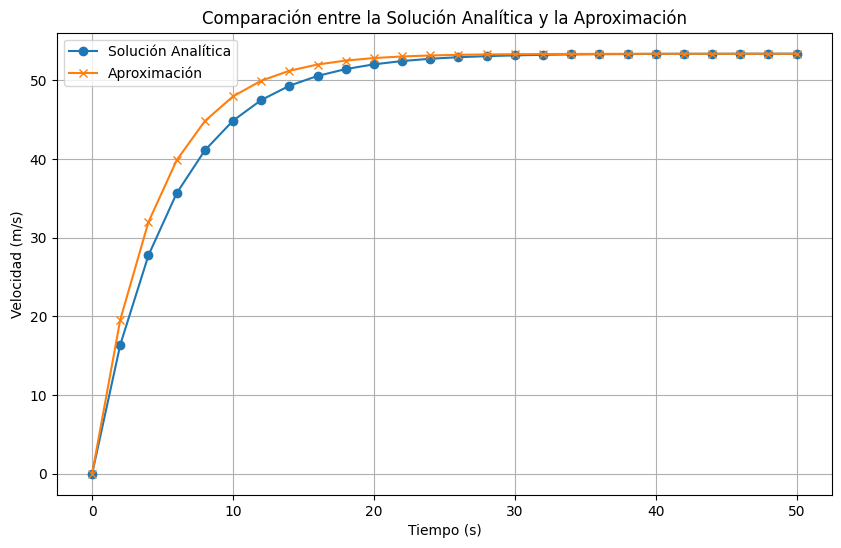

In [10]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(tiempos, velocidades_analiticas, label='Solución Analítica', marker='o')
plt.plot(tiempos, velocidades_aproximadas, label='Aproximación', marker='x')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Comparación entre la Solución Analítica y la Aproximación')
plt.legend()
plt.grid(True)
plt.show()

La grafica de comparación de velocidades en el tiempo de 0 a 49 segundos.

N.- 02) En clases se encontró que cunado la velocidad del viento es directamente proporcional al cuadrado de la velocidad (𝐹𝑑 = 𝑐𝑣2), la solución analítica y la aproximación se de las ecuaciones de la velocidad con respecto al tiempo son:

$$
\begin{align}
&v(t) =\sqrt\frac{gm}c \cdot \tanh \left( \sqrt \frac{gc}m \right) \\ \\
&v(t_{i+1}) = v(t_{i}) + \left( g - \frac{c}{m}v(t_{i})^2\right)(t_{i+1} - t_i)
\end{align}
$$

Escriba un programa para obtener las velocidades en un rango de tiempo de 0 a 49 segundos, tanto para la solución analítica como para la aproximación. Utilice el valor de la gravedad g
= 9.8 m/s2, y un coeficiente de resistencia es igual a c = 0.2 kg/s, Emplee un tamaño de paso (diferencia de tiempo) de dos segundos.


In [11]:
# Constantes
g = 9.8  # m/s^2
m = 68.1  # kg
c = 0.2   # kg/s
tiempo_maximo = 49  # segundos
tamaño_paso = 2  # segundos

# Función para calcular la velocidad analítica en un tiempo dado
def velocidad_analitica(t):
    return np.sqrt((g * m / c)) * np.tanh(np.sqrt((g * c / m)) * t)

# Función para calcular la velocidad aproximada en un tiempo dado
def velocidad_aproximada(ti, vi):
    return vi + (g - (c / m) * vi ** 2) * ti

# Rango de tiempo de 0 a 49 segundos con paso de 2 segundos
tiempos = np.arange(0, tiempo_maximo + tamaño_paso, tamaño_paso)

# Cálculo de velocidades usando las fórmulas
velocidades_analiticas = velocidad_analitica(tiempos)
velocidades_aproximadas = [0]  # Inicializamos la velocidad inicial en 0 m/s
for i in range(1, len(tiempos)):
    vi = velocidades_aproximadas[i - 1]
    ti = tamaño_paso
    v_aprox = velocidad_aproximada(ti, vi)
    velocidades_aproximadas.append(v_aprox)

# Crear un DataFrame con los valores
data = {
    'Tiempo (s)': tiempos,
    'Velocidad Analítica (m/s)': velocidades_analiticas,
    'Velocidad Aproximada (m/s)': velocidades_aproximadas
}
df = pd.DataFrame(data)

# Guardar el DataFrame en un archivo CSV
#df.to_csv('N2_resultados.csv', index=False,float_format='%.2f')
df.head()


,Tiempo (s),Velocidad Analítica (m/s),Velocidad Aproximada (m/s)
0,0,0.000000,0.000000
1,2,18.880946,19.600000
2,4,34.117072,36.943554
3,6,44.422583,48.526954
4,8,50.588060,54.295146


Haga una gráfica de velocidad contra tiempo y compare entre la solución analítica y la aproximación.

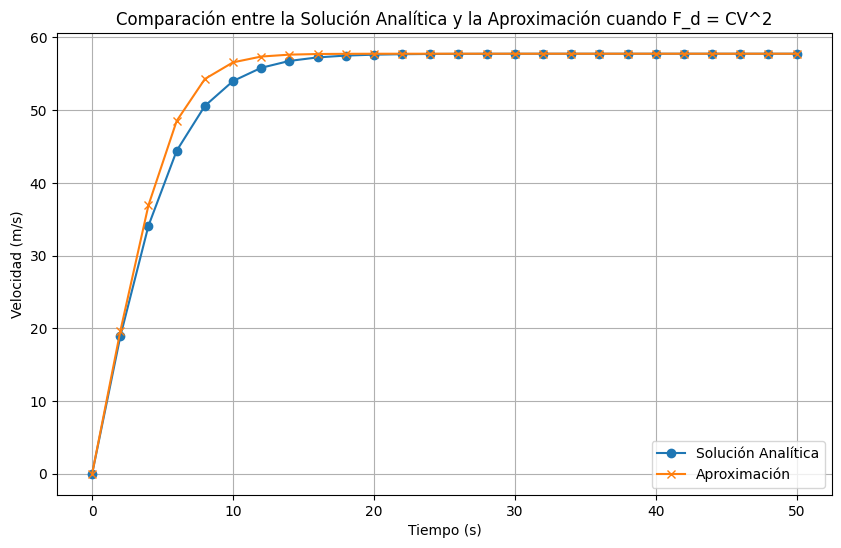

In [12]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(tiempos, velocidades_analiticas, label='Solución Analítica', marker='o')
plt.plot(tiempos, velocidades_aproximadas, label='Aproximación', marker='x')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Comparación entre la Solución Analítica y la Aproximación cuando F_d = CV^2')
plt.legend()
plt.grid(True)
plt.show()

N.-03 En el programa que se realizó para encontrar la velocidad en función del tiempo sobre el paracaidista (con 𝐹𝑑 = 𝑐𝑣) con una masa m = 68.1 kg y con un coeficiente de resistencia es igual a c = 12.5 kg/s, la ecuación que relaciona la velocidad con el tiempo, en forma aproximada es:


$$
\begin{align}
&v(t_{i+1}) = v(t_{i}) + \left( g - \frac{c}{m}v(t_{i})\right)(t_{i+1} - t_i)\\ \\
&v(t) =\frac{gm}c(1-e^{-\frac{c}{m}t})
\end{align}
$$

Incorpore adecuaciones a su programa para calcular los errores relativos aproximado y verdadero. Utilice aritmética de 4 dígitos y calcule los errores relativos aproximado y verdadero y finalice el programa cuando |𝜀𝑎| < 𝜀𝑠 = 0.05 %.


In [13]:

precision = 4
# Configurar el contexto decimal con la precisión proporcionada por el usuario
getcontext().prec = precision

# Constantes controladas por la precision asignada
g = Decimal('9.8 ') # m/s^2
m = Decimal('68.1')  # kg
c = Decimal('12.5 ') # kg/s^2
tiempo_maximo = 49  # segundos
tamaño_paso = 2  # segundos

ε_s = 0.0005  #definimos la tolerancia para el paro
Vv= (m*g)/c #valor verdadero cuando t->infinito

# Función para calcular la velocidad analítica en un tiempo dado
def velocidad_analitica(t):
    return (g * m / c) * (1 - np.exp(-c / m * t))

# Función para calcular la velocidad aproximada en un tiempo dado
def velocidad_aproximada(ti, vi):
    return vi + (g - (c / m) * vi) * ti

# Rango de tiempo de 0 a 49 segundos con paso de 2 segundos
tiempos = np.arange(0, tiempo_maximo + tamaño_paso, tamaño_paso)

# Cálculo de v(t)
velocidades_analiticas = velocidad_analitica(tiempos)
#calculo del error relativo  verdadero
error_rel_verd =[0]
for i in range(1,len(tiempos)):
    ε_t= abs((Vv-velocidades_analiticas[i])/Vv)
    error_rel_verd.append(ε_t)

#calculo de v(t+1)
velocidades_aproximadas = [0]  # Inicializamos la velocidad inicial en 0 m/s
error_rel_aprox = [0]              # inicializamos array para guardar el error_aprox

for i in range(1, len(tiempos)):
    # se asignan los vvalores de vi y ti iterativamente
    vi = Decimal(velocidades_aproximadas[i - 1])      # se pone i - 1 por que el bucle for de python inicia en 1
    ti = Decimal(tamaño_paso)
    # se calcula la velocidad aproximada
    v_aprox = velocidad_aproximada(ti, vi)
    # se agrega la velocidad aproximada al array
    velocidades_aproximadas.append(Decimal(v_aprox))
    # se calcula el error relativo  aproximado
    ε_a = Decimal((v_aprox - vi) / v_aprox)
    # se guarda el error en su array
    error_rel_aprox.append(ε_a)
    # se valida si el error relativo verdadero aproximado es menor a la tolerancia y si lo es, se sale del programa.
    if abs(ε_a) < ε_s:
        print (" El calculo se detuvo por que ε_a > ε_s")
        print(f'El programa se detuvo despues de {i} operaciones')
        break


# Crear un DataFrame con los valores
data = {
    'Tiempo (s)': tiempos[:len(velocidades_aproximadas)],
    'Velocidad Analítica (m/s)':  velocidades_analiticas[:len(velocidades_aproximadas)],
    'Error Relativo Verdadero': error_rel_verd[:len(velocidades_aproximadas)],
    'Velocidad Aproximada (m/s)': velocidades_aproximadas,
    'Error Relativo Aproximado': error_rel_aprox
}
df = pd.DataFrame(data)
df.head()


 El calculo se detuvo por que ε_a > ε_s
El programa se detuvo despues de 16 operaciones


,Tiempo (s),Velocidad Analítica (m/s),Error Relativo Verdadero,Velocidad Aproximada (m/s),Error Relativo Aproximado
0,0,0.00,0,0,0
1,2,16.41,0.6926,19.60,1
2,4,27.77,0.4799,32.00,0.3875
3,6,35.65,0.3323,39.85,0.1970
4,8,41.10,0.2302,44.82,0.1109


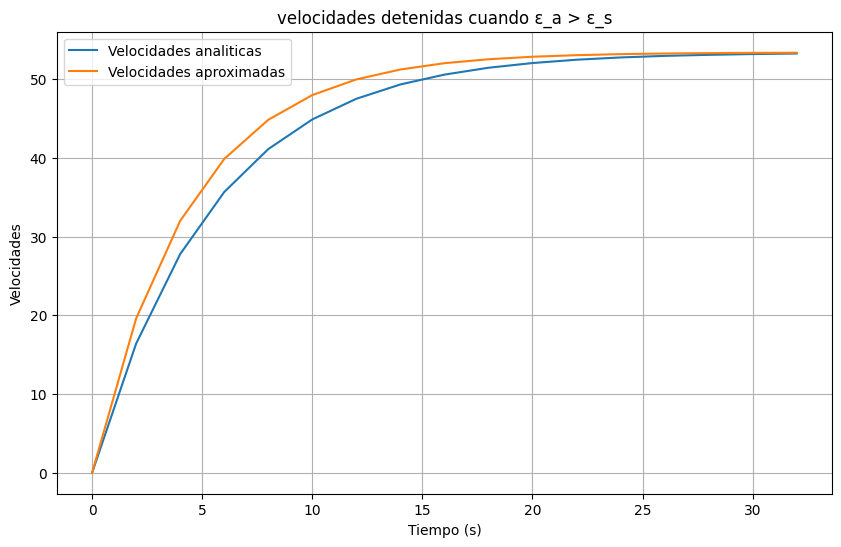

In [14]:
# Graficar errores relativos verdaderos y aproximados
plt.figure(figsize=(10, 6))
plt.plot(tiempos[:len(velocidades_aproximadas)], velocidades_analiticas[:len(velocidades_aproximadas)], label='Velocidades analiticas')
plt.plot(tiempos[:len(velocidades_aproximadas)], velocidades_aproximadas, label='Velocidades aproximadas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidades')
plt.title('velocidades detenidas cuando ε_a > ε_s')
plt.legend()
plt.grid(True)
#plt.savefig('errores.png')  # Guardar la gráfica como un archivo de imagen
plt.show()